Detected Number Plate: HRZGDK8337


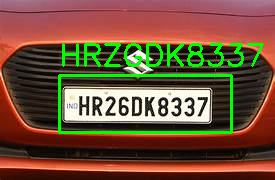

In [4]:
!pip install opencv-python easyocr

import cv2
import easyocr
import numpy as np
from google.colab.patches import cv2_imshow  # For image display in Colab

def detect_number_plate(image_path):
    # Load the image
    img = cv2.imread(image_path)
    if img is None:
        print("Error loading image!")
        return

    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Load Haar Cascade for number plate detection
    plate_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_russian_plate_number.xml')

    # Detect plates in the image
    plates = plate_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Load EasyOCR reader
    reader = easyocr.Reader(['en'])

    # Loop through detected plates
    for (x, y, w, h) in plates:
        # Draw a rectangle around the detected plate
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Crop the plate area
        plate_img = img[y:y+h, x:x+w]

        # Perform OCR on the cropped plate image
        result = reader.readtext(plate_img)

        # Display detected text on the original image
        for detection in result:
            text = detection[1]
            print(f"Detected Number Plate: {text}")
            cv2.putText(img, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Show the final image with annotations
    cv2_imshow(img)  # Works in Colab only

# Run the function
image_path = '/content/NUMPLATE.jpeg'  # Change this to your image path
detect_number_plate(image_path)
